In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout

In [2]:
# Mounting Google Drive to access files stored in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/NLP_Project/IMDB_Dataset_Preprocessed.csv')
df.head()

,Unnamed: 0,review,sentiment,word_count,char_count,cleaned_review,sentiment_numeric,flesch_kincaid_grade,gunning_fog_index,lexical_diversity,nouns,verbs,adjectives,adverbs,tokens,dominant_topic,vader_sentiment,textblob_sentiment,vader_polarity,textblob_polarity
0,0,One of the other reviewers has mentioned that ...,positive,166,1116,one reviewer mentioned watching oz episode you...,1,68.0,70.98,0.825301,78,33,40,10,"['one', 'reviewer', 'mentioned', 'watching', '...",2,negative,positive,-0.9941,0.023881
1,1,A wonderful little production. <br /><br />The...,positive,84,640,wonderful little production filming technique ...,1,40.8,43.12,0.904762,33,18,20,11,"['wonderful', 'little', 'production', 'filming...",3,positive,positive,0.9571,0.127604
2,2,I thought this was a wonderful way to spend ti...,positive,85,572,thought wonderful way spend time hot summer we...,1,37.6,41.53,0.952941,39,19,18,6,"['thought', 'wonderful', 'way', 'spend', 'time...",3,positive,positive,0.9688,0.278571
3,3,Basically there's a family where a little boy ...,negative,67,443,basically there family little boy jake think t...,0,30.6,32.17,0.791045,32,13,12,5,"['basically', 'there', 'family', 'little', 'bo...",4,negative,positive,-0.9061,0.018056
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,125,843,petter matteis love time money visually stunni...,1,53.2,55.44,0.800000,61,23,29,5,"['petter', 'matteis', 'love', 'time', 'money',...",3,positive,positive,0.9887,0.239534


In [4]:
# Function to print evaluation metrics
def evaluate_model(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

**RoBERTa**

In [5]:
X_roberta = np.load('/content/drive/MyDrive/NLP_Project/X_roberta.npy')
print("RoBERTa Feature Shape:", X_roberta.shape)

RoBERTa Feature Shape: (50000, 768)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(X_roberta)
X_roberta = model.transform(X_roberta)

In [7]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_roberta, df['sentiment_numeric'], test_size=0.2, random_state=42)

In [25]:
# Train a Logistic Regression model
clf_roberta = LogisticRegression(max_iter=1000)
clf_roberta.fit(X_train, y_train)
print("Logistic Regression with RoBERTa:")
evaluate_model(y_test, clf_roberta.predict(X_test))

Logistic Regression with RoBERTa:
Accuracy: 0.86
Precision: 0.87
Recall: 0.85
F1-Score: 0.86


In [ ]:
# Train a Support Vector Machine (SVM)
svm_roberta = SVC(kernel='linear')
svm_roberta.fit(X_train, y_train)
print("SVM with RoBERTa:")
evaluate_model(y_test, svm_roberta.predict(X_test))

SVM with RoBERTa:
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1-Score: 0.86


In [ ]:
# Train a RF Classifier
rf_roberta = RandomForestClassifier(n_estimators=100)
rf_roberta.fit(X_train, y_train)
print("Random Forest with RoBERTa:")
evaluate_model(y_test, rf_roberta.predict(X_test))

Random Forest with RoBERTa:
Accuracy: 0.81
Precision: 0.81
Recall: 0.82
F1-Score: 0.81


In [10]:
# LSTM model:
lstm_model_roberta = Sequential()
lstm_model_roberta.add(Embedding(input_dim=768, output_dim=128))
lstm_model_roberta.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
lstm_model_roberta.add(Dense(1, activation='sigmoid'))
lstm_model_roberta.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = lstm_model_roberta.fit(X_train, y_train, epochs=1, batch_size=2048, validation_split=0.2, verbose=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5025 - loss: 0.6927 - val_accuracy: 0.5565 - val_loss: 0.6881


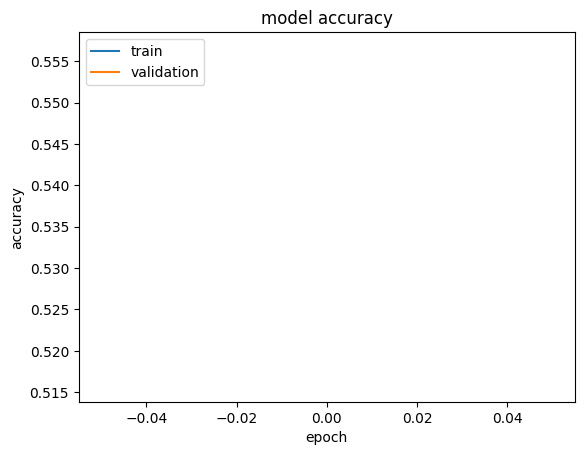

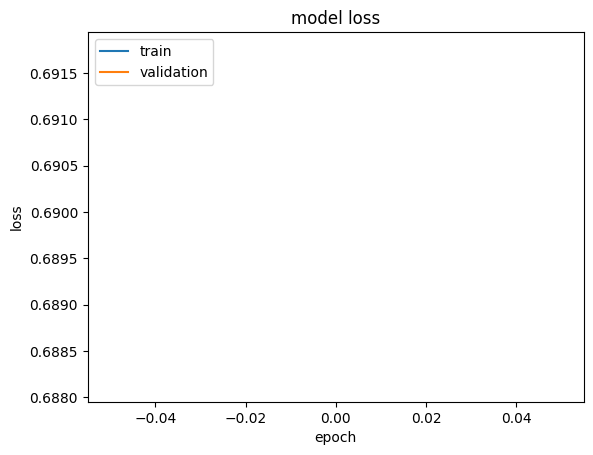

In [12]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [38]:
print("LSTM with RoBERTa:")
evaluate_model(y_test, lstm_model_roberta.predict(X_test).round())

LSTM with RoBERTa:
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 482ms/step
Accuracy: 0.58
Precision: 0.60
Recall: 0.51
F1-Score: 0.55


**DistilBERT**

In [13]:
X_distilbert = np.load('/content/drive/MyDrive/NLP_Project/X_distilbert.npy')
print("DistilBERT Feature Shape:", X_distilbert.shape)

DistilBERT Feature Shape: (50000, 768)


In [14]:
scaler = StandardScaler()
model = scaler.fit(X_distilbert)
X_distilbert = model.transform(X_distilbert)

In [15]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_distilbert, df['sentiment_numeric'], test_size=0.5, random_state=42)

In [ ]:
# Train a Logistic Regression model
clf_distilbert = LogisticRegression(max_iter=1000)
clf_distilbert.fit(X_train, y_train)
print("Logistic Regression with DistilBERT:")
evaluate_model(y_test, clf_distilbert.predict(X_test))

Logistic Regression with DistilBERT:
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1-Score: 0.85


In [ ]:
# Train a Support Vector Machine (SVM)
svm_distilbert = SVC(kernel='linear')
svm_distilbert.fit(X_train, y_train)
print("SVM with DistilBERT:")
evaluate_model(y_test, svm_distilbert.predict(X_test))

SVM with DistilBERT:
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1-Score: 0.85


In [ ]:
# Train a RF Classifier
rf_distilbert = RandomForestClassifier(n_estimators=100)
rf_distilbert.fit(X_train, y_train)
print("Random Forest with DistilBERT:")
evaluate_model(y_test, rf_distilbert.predict(X_test))

Random Forest with DistilBERT:
Accuracy: 0.79
Precision: 0.79
Recall: 0.80
F1-Score: 0.79


In [17]:
# LSTM model:
lstm_model_distilbert = Sequential()
lstm_model_distilbert.add(Embedding(input_dim=768, output_dim=128))
lstm_model_distilbert.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
lstm_model_distilbert.add(Dense(1, activation='sigmoid'))
lstm_model_distilbert.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = lstm_model_distilbert.fit(X_train, y_train, epochs=1, batch_size=2048, validation_split=0.2, verbose=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5095 - loss: 0.6923 - val_accuracy: 0.5512 - val_loss: 0.6854


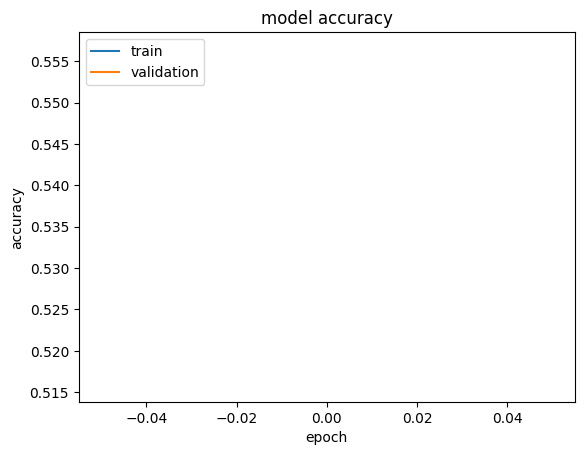

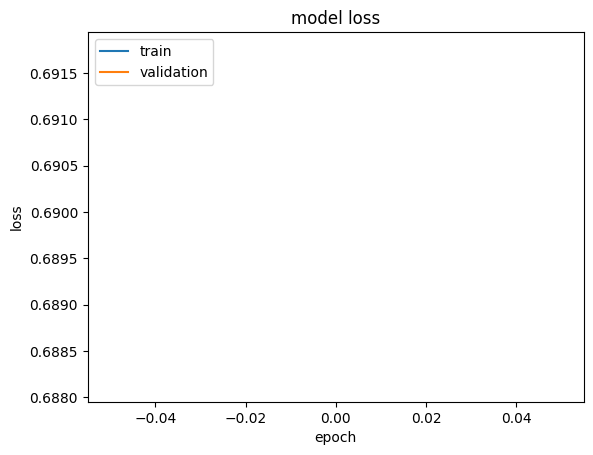

In [16]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
print("LSTM with DistilBERT:")
evaluate_model(y_test, lstm_model_distilbert.predict(X_test).round())

LSTM with DistilBERT:
782/782 ━━━━━━━━━━━━━━━━━━━━ 177s 226ms/step
Accuracy: 0.55
Precision: 0.59
Recall: 0.32
F1-Score: 0.41
